In [3]:
%matplotlib inline
import os

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

### Распределение дозы по глубине

In [2]:
paths = glob.glob(f"build/*DoseDist_t*.csv")

In [3]:
data = pd.DataFrame()

for path in paths:
    item = pd.read_csv(path, skiprows=8, names=['edep', 'x', 'y', 'z'])
    data = data.append(item, ignore_index=True)

In [4]:
data = data.sort_values(by=['z'], ascending=False)

In [5]:

data['z'] -= data['z'].min()
z_bins = 300
dz = (data['z'].max() - data['z'].min()) / z_bins

In [6]:
data_dict = []
for i in np.arange(data['z'].min(), data['z'].max(), dz):
    data_dict.append({'z': i + dz / 2, 'edep': data[(data['z'] > i) & (data['z'] < (i + dz))]['edep'].sum()})

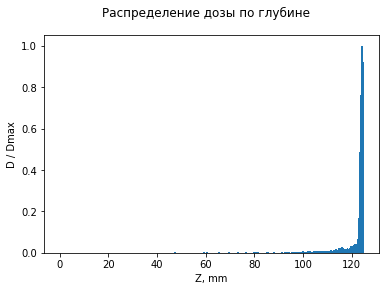

In [7]:
hist = pd.DataFrame(data_dict)
hist['edep'] /= hist['edep'].max()

d2plot = hist['edep'].values[::-1]
plt.bar(np.arange(len(d2plot)) * dz + dz / 2, d2plot)

hist['z'] = hist['z'].values[::-1]
#hist.sort_values(by=['z']).to_csv('aDoseDepthHist.csv', index=False)
plt.ylabel('D / Dmax')
plt.xlabel('Z, mm')
plt.suptitle('Распределение дозы по глубине')
#plt.savefig('aDoseDepthHist.png')

### Распределение по энергии и типу частиц

In [8]:
paths = glob.glob(f"build/*DoseData_t*.csv")

In [9]:
data = pd.DataFrame()

for path in paths:
    item = pd.read_csv(path, skiprows=8, names=['particle_name', 'energy'])
    data = data.append(item, ignore_index=True)

In [10]:
particle_names = [name for name in set(data["particle_name"].values) if not name.startswith("W")]
datas = {}
for name in particle_names:
    if name.startswith("W") is False:
        datas[name] = data[data["particle_name"]==name]

In [11]:
particle_names

['gamma', 'e+', 'e-']

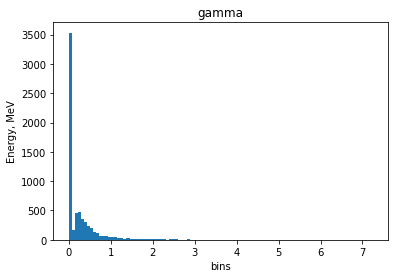

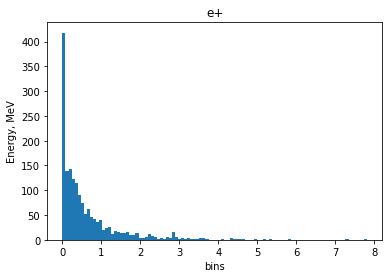

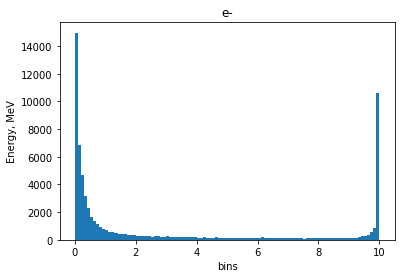

In [12]:
for name in particle_names:
    d = datas[name]["energy"].to_numpy()
    plt.hist(d, bins=100)
    plt.title(name)
    plt.ylabel('Energy, MeV')
    plt.xlabel('bins')
    plt.show()